# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 2: Youtube trending page analysis

## Group members 
- Group member 
    - Name: Amira Bendjama
    - Email: ab4745@drexel.edu
- Group member 
    - Name: Thuy Hong Doan
    - Email: td688@drexel.edu
- Group member 
    - Name: Alsulami Meznah
    - Email: mha54@drexel.edu

## Cleaning Youtube trending dataset 

Before starting the anaylsis, it is important to clean the dataset that the project relies on. The project cleaning consisted of: 
- Finding and deleting rows with a missing values, which were mainly in the Description column. 
- Replacing NaN in description with space.
- Deleting rows with comments_disabled=True or ratings_disabled=True.
- Fixing the Tags column,by Replacing "[None]" with space, and spliting tags with '|' and convert list to one string.
- Dropping duplicates rows in video id column.
- Converting date columns 'publishedAt', 'trending_date' to datetime type.
- Reseting indexing of the dataframe


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

US_category_id = pd.read_json('data/US_category_id.json')
trending_youtube = pd.read_csv('data/US_youtube_trending_data.csv')


In [103]:
# getting information about the dataset
trending_youtube.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180390 entries, 0 to 180389
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           180390 non-null  object
 1   title              180390 non-null  object
 2   publishedAt        180390 non-null  object
 3   channelId          180390 non-null  object
 4   channelTitle       180390 non-null  object
 5   categoryId         180390 non-null  int64 
 6   trending_date      180390 non-null  object
 7   tags               180390 non-null  object
 8   view_count         180390 non-null  int64 
 9   likes              180390 non-null  int64 
 10  dislikes           180390 non-null  int64 
 11  comment_count      180390 non-null  int64 
 12  thumbnail_link     180390 non-null  object
 13  comments_disabled  180390 non-null  bool  
 14  ratings_disabled   180390 non-null  bool  
 15  description        176384 non-null  object
dtypes: bool(2), int64(5)

In [104]:
# cleaning dataset 
# number of null values in the dataset
trending_youtube.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4006
dtype: int64

The description column has all null values. These are some of the rows whose description values are null.

In [105]:
trending_youtube[trending_youtube["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
223,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62939,168,7304,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN
249,NYXABBpPJss,When you get on the grill for your friends Bir...,2020-08-12T04:36:57Z,UCI8hY4ummWDZgFSjxU_HFNQ,Jeremiah Phillips,23,2020-08-13T00:00:00Z,[None],193157,9057,148,666,https://i.ytimg.com/vi/NYXABBpPJss/default.jpg,False,False,NaN
446,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-14T00:00:00Z,Lock|picking,511773,69610,214,7837,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,NaN


In [106]:
# Replace NaN in description with space
trending_youtube["description"].fillna(" ", inplace=True)
# Delete all rows with a missing values if any
trending_youtube.dropna(inplace=True)

In [107]:
# checking for the NAN values
trending_youtube.isnull().sum().sum()

0

In [108]:
trending_youtube.shape

(180390, 16)

Since our main focus is to find factors that effect the trending of a video, any videos with disbaled comments of ratings will be exculded from our project.

In [109]:
# delete rows with comments_disabled=True or ratings_disabled=True
trending_youtube = trending_youtube[(trending_youtube['comments_disabled'] == False) &
                    (trending_youtube['ratings_disabled'] == False)]
trending_youtube.shape

(177001, 16)

In [110]:
trending_youtube["tags"].head(10)

0    brawadis|prank|basketball|skits|ghost|funny vi...
1    Apex Legends|Apex Legends characters|new Apex ...
2    jacksepticeye|funny|funny meme|memes|jacksepti...
3    xxl freshman|xxl freshmen|2020 xxl freshman|20...
4    The LaBrant Family|DIY|Interior Design|Makeove...
5    Professor injury|professor achilles|professor ...
6                                               [None]
7                     cgpgrey|education|hello internet
8    surprising|dad|father|papa|with|dream|car|truc...
9    Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...
Name: tags, dtype: object

Tags columns is not comphrensive, that's why we need to convert "none" values into empty string and remove "|" to form one string for each row.

In [111]:
# Replace [None] in tags with space 
trending_youtube.loc[trending_youtube['tags'] == '[None]', 'tags'] = ' '
# split tags with '|' and convert list to one string
trending_youtube['tags'] = [' '.join(tag) \
                       for tag in trending_youtube['tags'].str.split('|')]

trending_youtube["tags"].head(10)

0    brawadis prank basketball skits ghost funny vi...
1    Apex Legends Apex Legends characters new Apex ...
2    jacksepticeye funny funny meme memes jacksepti...
3    xxl freshman xxl freshmen 2020 xxl freshman 20...
4    The LaBrant Family DIY Interior Design Makeove...
5    Professor injury professor achilles professor ...
6                                                     
7                     cgpgrey education hello internet
8    surprising dad father papa with dream car truc...
9    Vengo De Nada Aleman Ovi Big Soto Trap Ovi Nat...
Name: tags, dtype: object

There is a lot of duplicates rows in the dataset, where we can verify using video id column and unique() to get the real size of nonduplicates rows. That's any row with duplicate title and video id will be dropped from the dataset.

In [112]:
len(trending_youtube['video_id'].unique())

32449

In [113]:
len(trending_youtube['video_id'])

177001

In [114]:
# .drop_duplicates()
# these are the duplicate values with same video id
duplicates = trending_youtube[trending_youtube['video_id'].duplicated() == True]
duplicates

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
202,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13T00:00:00Z,brawadis prank basketball skits ghost funny vi...,3017834,183592,9506,41374,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
207,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-13T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2802823,401421,3728,44546,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
209,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-13T00:00:00Z,Apex Legends Apex Legends characters new Apex ...,2932421,153682,3281,17454,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
213,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-13T00:00:00Z,The LaBrant Family DIY Interior Design Makeove...,1922758,54959,1758,2662,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
214,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-13T00:00:00Z,xxl freshman xxl freshmen 2020 xxl freshman 20...,944498,29016,2809,9278,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180385,xxSyov0Hjz8,Tom Hanks Eats His Last Meal,2023-01-19T11:00:29Z,UCXGR70CkW_pXb8n52LzCCRw,Mythical Kitchen,24,2023-01-26T00:00:00Z,mythical kitchen mythical chef josh scherer ni...,1218886,67099,0,4899,https://i.ytimg.com/vi/xxSyov0Hjz8/default.jpg,False,False,"Today, Josh is cooking Tom Hanks's last meal.D..."
180386,rkXx6yqsgOY,Japan $1000 Crane Game Challenge Ft. @Daidus,2023-01-19T18:15:03Z,UCPsZ_0SkFdi551iYTG04R2g,CDawgVA,24,2023-01-26T00:00:00Z,Crane Game Japan UFO Catcher CDawg Daidus Conn...,925816,60351,0,2292,https://i.ytimg.com/vi/rkXx6yqsgOY/default.jpg,False,False,Use my code CDAWG15 at https://partner.bokksu....
180387,7nKMUkcSC2s,Wednesday Pitch Meeting,2023-01-19T20:15:00Z,UC9Kq-yEt1iYsbUzNOoIRK0g,Pitch Meeting,24,2023-01-26T00:00:00Z,Wednesday addams family christina ricci funny ...,1183539,82003,0,6272,https://i.ytimg.com/vi/7nKMUkcSC2s/default.jpg,False,False,Step inside the Pitch Meeting that led to Wedn...
180388,ZWj-Z4Z2W3k,The Kid LAROI - I Can’t Go Back To The Way It ...,2023-01-19T15:00:20Z,UC6G2vAJrt407lwiynW116Eg,The Kid LAROI.,10,2023-01-26T00:00:00Z,the kid laroi thekidlaroi laroi tkl the first ...,1195825,55682,0,2831,https://i.ytimg.com/vi/ZWj-Z4Z2W3k/default.jpg,False,False,The Kid LAROI I Can’t Go Back To The Way It Wa...


There is almost 7 duplicates for a single video! since while collecting dataset, the video can remain in the trending page for a while so when collecting the dataset it will get the video multiple times but with different viewer count and comments and other variables. so when we drop our duplicates we make sure to leave the last time the video was trending. 

In [115]:
trending_youtube[trending_youtube['video_id'] == "J78aPJ3VyNs"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
207,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-13T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2802823,401421,3728,44546,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
442,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-14T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3136088,427609,4009,46133,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
657,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-15T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3309124,442555,4156,46699,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
909,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-16T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3384892,448809,4209,47003,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1159,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-17T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3439181,453464,4246,47188,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
1399,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-18T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,3490530,457130,4269,47291,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [116]:
len(duplicates['video_id'])

144552

In [117]:
# trending_youtube.drop_duplicates(subset=['title','video_id'], keep='last' , inplace= True)
trending_youtube.drop_duplicates(subset=['title','video_id'], keep='first' , inplace= True)

In [118]:
# last updated video before leaving the trending page
trending_youtube[trending_youtube['video_id'] == "J78aPJ3VyNs"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [119]:
len(trending_youtube)

33461

Converting date columns from object to datetime type, to easily manipulate them in the analysis.

In [120]:
trending_youtube.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [121]:
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11T19:20:14Z,2020-08-12T00:00:00Z
1,2020-08-11T17:00:10Z,2020-08-12T00:00:00Z
2,2020-08-11T16:34:06Z,2020-08-12T00:00:00Z
3,2020-08-11T16:38:55Z,2020-08-12T00:00:00Z
4,2020-08-11T15:10:05Z,2020-08-12T00:00:00Z


In [122]:
#Trending date column has object data type which needs to changed as datetime
trending_youtube['trending_date'] = pd.to_datetime(trending_youtube['trending_date'], format = "%Y-%m-%dT%H:%M:%SZ")
#The publishedAt column converted with the astype function
trending_youtube['publishedAt'] = trending_youtube['publishedAt'].astype('datetime64[ns]')
trending_youtube[['publishedAt', 'trending_date']].head()

,publishedAt,trending_date
0,2020-08-11 19:20:14,2020-08-12
1,2020-08-11 17:00:10,2020-08-12
2,2020-08-11 16:34:06,2020-08-12
3,2020-08-11 16:38:55,2020-08-12
4,2020-08-11 15:10:05,2020-08-12


In [123]:
trending_youtube[['trending_date','publishedAt']].dtypes

trending_date    datetime64[ns]
publishedAt      datetime64[ns]
dtype: object

Since we dropped rows and change few parts in the dataset, the indexing of the dataframe won't be coherent, we can simply reset it.

In [124]:
trending_youtube.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            180227, 180228, 180229, 180230, 180237, 180238, 180242, 180257,
            180288, 180375],
           dtype='int64', length=33461)

In [125]:
trending_youtube.reset_index(drop=True, inplace=True)

In [126]:
trending_youtube.index

RangeIndex(start=0, stop=33461, step=1)

In [127]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33461 entries, 0 to 33460
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33461 non-null  object        
 1   title              33461 non-null  object        
 2   publishedAt        33461 non-null  datetime64[ns]
 3   channelId          33461 non-null  object        
 4   channelTitle       33461 non-null  object        
 5   categoryId         33461 non-null  int64         
 6   trending_date      33461 non-null  datetime64[ns]
 7   tags               33461 non-null  object        
 8   view_count         33461 non-null  int64         
 9   likes              33461 non-null  int64         
 10  dislikes           33461 non-null  int64         
 11  comment_count      33461 non-null  int64         
 12  thumbnail_link     33461 non-null  object        
 13  comments_disabled  33461 non-null  bool          
 14  rating

In [128]:
#creating dictionary for json file provided for category and category id
category_dict = {}
for i in US_category_id['items']:
    category_dict[i['id']] = i['snippet']['title']

In [129]:
#replacing the category id with category actual name 
def replace_categoryid(df):
    if str(df) in category_dict:
        return category_dict[str(df)]
    
trending_youtube['category'] = trending_youtube['categoryId'].apply(replace_categoryid)

In [130]:
trending_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33461 entries, 0 to 33460
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33461 non-null  object        
 1   title              33461 non-null  object        
 2   publishedAt        33461 non-null  datetime64[ns]
 3   channelId          33461 non-null  object        
 4   channelTitle       33461 non-null  object        
 5   categoryId         33461 non-null  int64         
 6   trending_date      33461 non-null  datetime64[ns]
 7   tags               33461 non-null  object        
 8   view_count         33461 non-null  int64         
 9   likes              33461 non-null  int64         
 10  dislikes           33461 non-null  int64         
 11  comment_count      33461 non-null  int64         
 12  thumbnail_link     33461 non-null  object        
 13  comments_disabled  33461 non-null  bool          
 14  rating

# Exploratory data analysis

#### 1. What categories that youtube users in the US are interested in?

In [131]:
#Groupby and sum view count, likes, dislikes, comment_count  by category 
lst = ['view_count','likes','dislikes','comment_count','category']
category_group = trending_youtube[lst].groupby('category').sum()
category_group

,view_count,likes,dislikes,comment_count
category,,,,
Autos & Vehicles,382082761,20154763,176574,1811647
Comedy,1619521246,136874500,1063010,7847515
Education,795420200,52766080,468162,3328041
Entertainment,9796290327,608901110,5209413,42139060
Film & Animation,1514719127,84878732,655194,6259884
Gaming,7098179304,456689466,4347150,36330609
Howto & Style,698449682,42919460,752486,3446580
Music,9491945103,986217212,8248322,99509764
News & Politics,1205657795,17008993,1007556,4922220


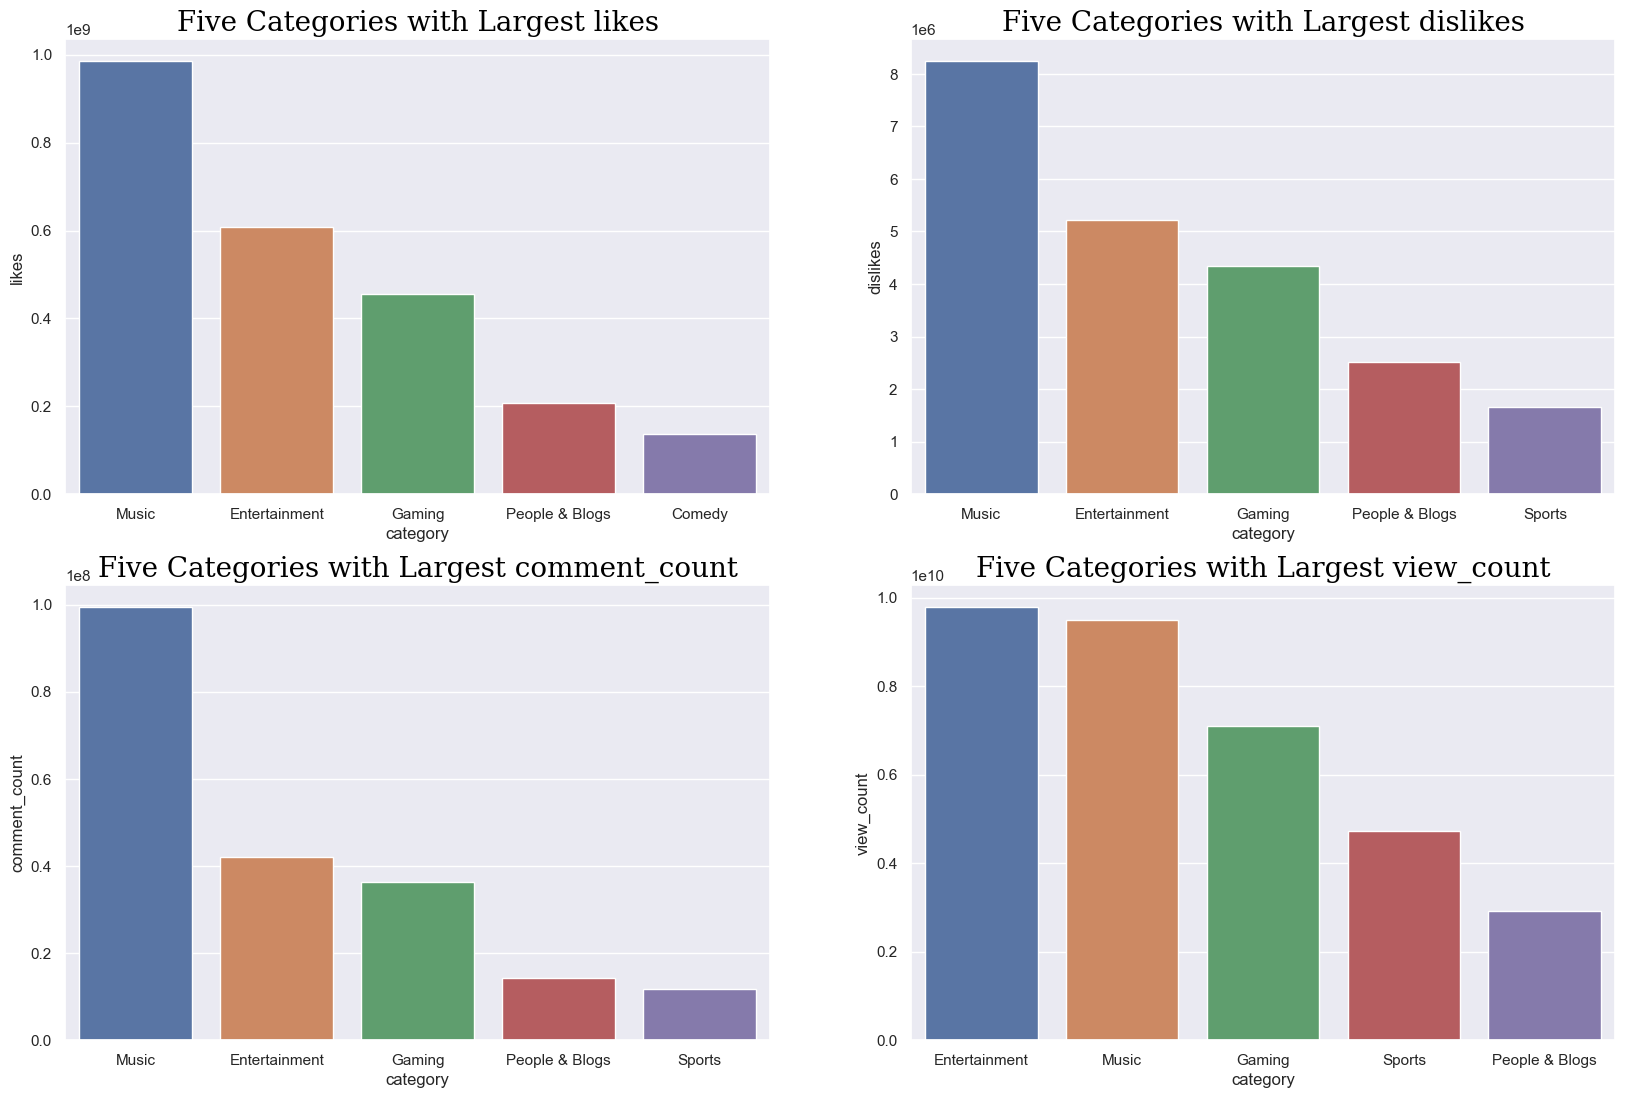

In [132]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','comment_count','view_count',]
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nlargest(5).index
    y = category_group[lst[i]].nlargest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Largest " + lst[i]
    plt.title(title,font)

Based on the diagrams above, the categories that most youtube's users search for on Youtube are music, entertainment, gaming, people, and sports, respectively.

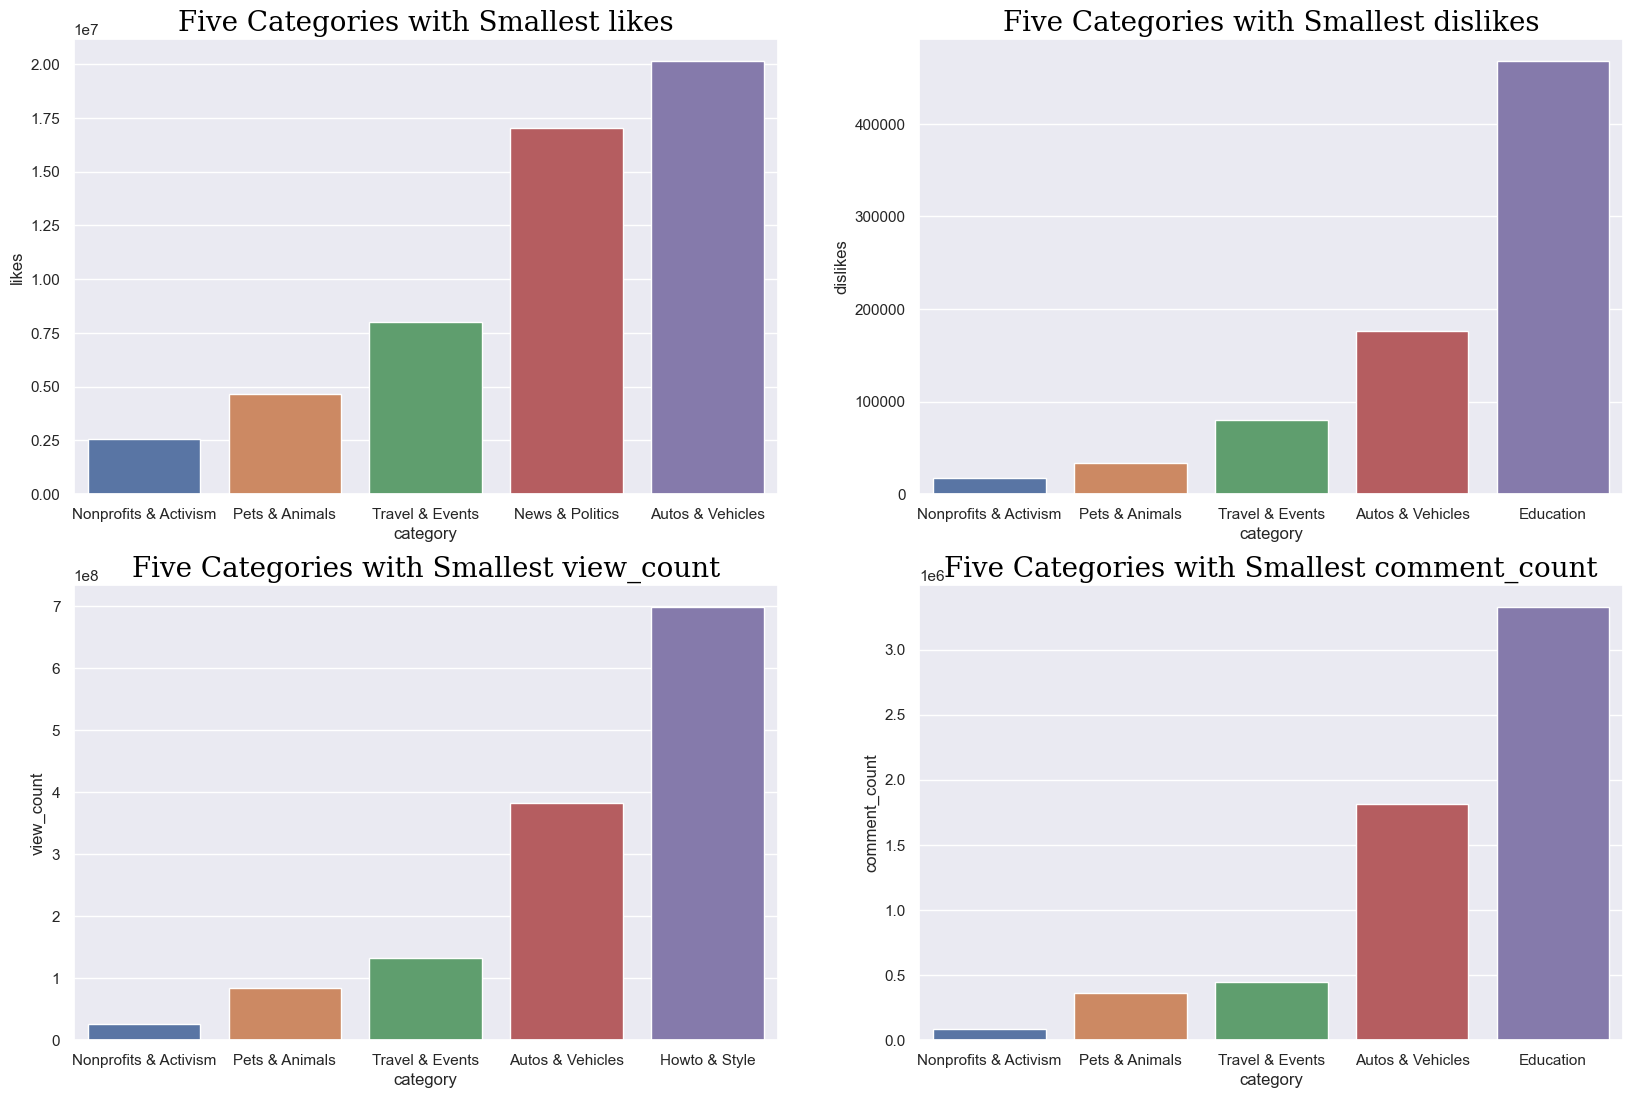

In [133]:
#Plotting the 5 categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,13))
plt.subplot(2,2,1)

lst = ['likes','dislikes','view_count','comment_count']
font = {'family':'serif','color':'black','size':20}
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    x = category_group[lst[i]].nsmallest(5).index
    y = category_group[lst[i]].nsmallest(5)
    sns.barplot(x = x,y = y)
    title = "Five Categories with Smallest " + lst[i]
    plt.title(title,font)


Based on the diagrams above, youtube users are not interested much in the nonprofit, pet & animals, and travels category.

In [134]:
trending_youtube.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis prank basketball skits ghost funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends Apex Legends characters new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming


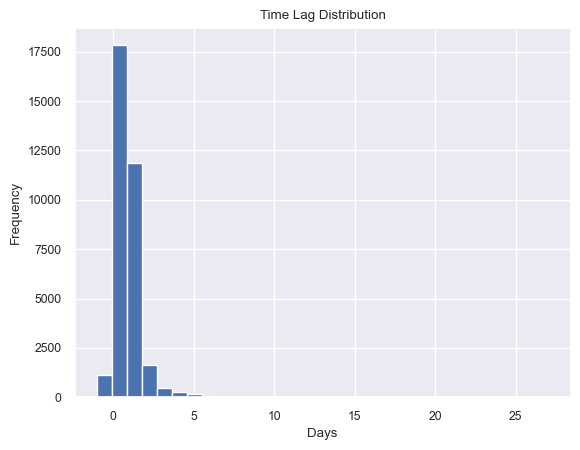

In [177]:
# Create a new column for time lag between publishing and trending
time_lag = (trending_youtube['trending_date'] - trending_youtube['publishedAt']).dt.days

# Plot time lag distribution
plt.hist(time_lag, bins=30)
plt.title('Time Lag Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


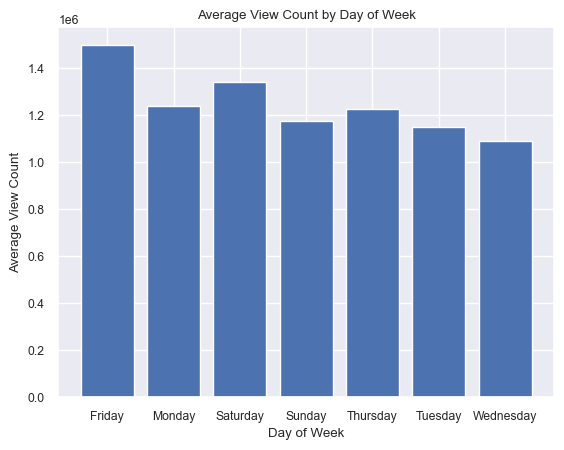

In [178]:
trending_youtube['hour'] = trending_youtube['publishedAt'].dt.hour
trending_youtube['day_of_week'] = trending_youtube['publishedAt'].dt.day_name()
# Group by day of week and calculate average view count
daily_view_count = trending_youtube.groupby('day_of_week')['view_count'].mean()

# Plot average view count by day of week
plt.bar(daily_view_count.index, daily_view_count.values)
plt.title('Average View Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average View Count')
plt.show()

### Finding most used words in youtube trending videos: 

In [135]:
def count_words(main_data):
    
    word_counter = 0
    
    for texts in main_data["title"]:
        for words in texts:  
            word_counter = word_counter + 1
        
    return word_counter

In [136]:
# !pip install demoji
# !pip install contractions

In [137]:
import demoji
import re
import contractions

def remove_emojis(text):
    return demoji.replace(text, "")


def expand_contractions(text):
    expanded_sentence = contractions.fix(text)
    return expanded_sentence


def clean_text(text):
    # Remove emojis
    text = remove_emojis(text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Handle contractions (replace contractions with full words, i.e. you're >> you are)
    text = expand_contractions(text.lower())
    
    # Find and remove repeated words
    cleaned_text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    
    return text

In [138]:
count_words(trending_youtube) , trending_youtube['title'].head(5)

(1690932,
 0                   I ASKED HER TO BE MY GIRLFRIEND...
 1    Apex Legends | Stories from the Outlands – “Th...
 2    I left youtube for a month and THIS is what ha...
 3    XXL 2020 Freshman Class Revealed - Official An...
 4    Ultimate DIY Home Movie Theater for The LaBran...
 Name: title, dtype: object)

In [139]:
trending_youtube['title'] = trending_youtube['title'].apply(lambda x:clean_text(x))
count_words(trending_youtube) , trending_youtube['title'].head(5)

(1569469,
 0                      i asked her to be my girlfriend
 1    apex legends  stories from the outlands  the e...
 2    i left youtube for a month and this is what ha...
 3    xxl  freshman class revealed  official announc...
 4    ultimate diy home movie theater for the labran...
 Name: title, dtype: object)

In [140]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ") ])
temp = pd.DataFrame(top.most_common(100))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,,34220
1,the,7809
2,official,3969
3,in,3636
4,i,3627
5,video,3429
6,to,3382
7,a,3381
8,of,2544
9,vs,1938


In [141]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Stop words 

In [142]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [143]:
trending_youtube['title'] = trending_youtube['title'].apply(lambda x:remove_stopwords(x))
count_words(trending_youtube) , trending_youtube['title'].head(5)


(1315880,
 0                                     asked girlfriend
 1            apex legends stories outlands endorsement
 2                          left youtube month happened
 3    xxl freshman class revealed official announcement
 4       ultimate diy home movie theater labrant family
 Name: title, dtype: object)

In [144]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ") ])
temp = pd.DataFrame(top.most_common(100))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,official,3969
1,video,3429
2,vs,1938
3,highlights,1648
4,minecraft,1613
5,trailer,1395
6,music,1274
7,new,1185
8,game,1115
9,shorts,941


## Stemming and lemmatizaiton

In [145]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
# nltk.download('punkt')
# nltk.download('omw-1.4')
# from nltk.stem import WordNetLemmatizer

In [146]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def lexicon_normalization(text):
                          
    # 1- Stemming
    words_stem = porter_stemmer.stem(text)
    
    #  Lemmatization
    words_lem = wordnet_lemmatizer.lemmatize(words_stem)
    return words_lem

trending_youtube['title']= trending_youtube['title'].apply(lambda x: lexicon_normalization(x))
print(count_words(trending_youtube))


1285473


In [147]:
# trending_youtube['title']= trending_youtube['title'].apply(lambda x: clean_repeated_words(x))
# count_words(trending_youtube) , trending_youtube['title'].head(5)

In [148]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ") ])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,official,3945
1,video,3444
2,vs,1928
3,minecraft,1613
4,highlights,1299
5,new,1292
6,music,1262
7,game,982
8,short,818
9,ft,816


## Tokenization

In [149]:
def tokenization(text):
    words = nltk.word_tokenize(text) 
#     words = ' '.join(words)
    return ' '.join(words)


In [150]:
trending_youtube['title']= trending_youtube['title'].apply(lambda x: tokenization(x))
count_words(trending_youtube) , trending_youtube['title'].head(5)

(1285586,
 0                                  asked girlfriend
 1              apex legends stories outlands endors
 2                         left youtube month happen
 3      xxl freshman class revealed official announc
 4    ultimate diy home movie theater labrant famili
 Name: title, dtype: object)

In [151]:
from collections import Counter

top = Counter([item for titles in trending_youtube['title'] for item in titles.split(" ")])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')


,Common_words,count
0,official,3945
1,video,3444
2,vs,1928
3,minecraft,1613
4,highlights,1299
5,new,1292
6,music,1262
7,game,982
8,short,818
9,ft,816


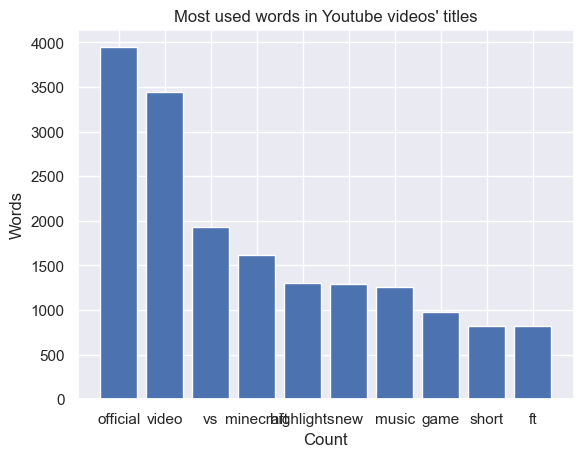

In [152]:

# plot the dataframe as a horizontal bar plot
plt.bar(temp['Common_words'], temp['count'])

# add labels and title
plt.xlabel('Count')
plt.ylabel('Words')
plt.title("Most used words in Youtube videos' titles")

# show the plot
plt.show()


## Feature engineering 

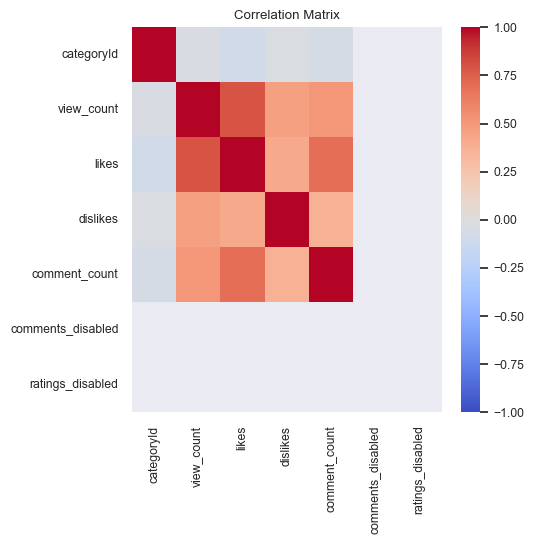

In [153]:
# Set up the figure size and style
corr = trending_youtube.corr()

plt.figure(figsize=(5, 5))
sns.set(font_scale=0.8)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title to the plot
plt.title('Correlation Matrix')
plt.show()

In [154]:
trending_youtube.info()
youtube = trending_youtube.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33461 entries, 0 to 33460
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           33461 non-null  object        
 1   title              33461 non-null  object        
 2   publishedAt        33461 non-null  datetime64[ns]
 3   channelId          33461 non-null  object        
 4   channelTitle       33461 non-null  object        
 5   categoryId         33461 non-null  int64         
 6   trending_date      33461 non-null  datetime64[ns]
 7   tags               33461 non-null  object        
 8   view_count         33461 non-null  int64         
 9   likes              33461 non-null  int64         
 10  dislikes           33461 non-null  int64         
 11  comment_count      33461 non-null  int64         
 12  thumbnail_link     33461 non-null  object        
 13  comments_disabled  33461 non-null  bool          
 14  rating

In [155]:
# Number of tags
tags_count = [x.count("|")+1 for x in youtube["tags"]]
youtube["nb_tags"] = tags_count

# Length of description
desc_len = [len(x) for x in youtube["description"]]
youtube["desc_length"] = desc_len

# Length of title
title_len = [len(x) for x in youtube["title"]]
youtube["title_length"] = title_len

# Create a "days_to_trend" column by calculating the number of days it took for each video to become trending
youtube["days_to_trend"] = (youtube["trending_date"].dt.date - youtube["publishedAt"].dt.date).dt.days
youtube.loc[youtube["days_to_trend"] == 0, "days_to_trend"] = 1

# Keeping only videos that trended in the first 24 hours from posting
youtube = youtube[(youtube["days_to_trend"] == 1) | (youtube["days_to_trend"] == 2)]
youtube["days_to_trend"].value_counts()

# Ratio of views to likes
youtube["view_likes_ratio"] = round(youtube["view_count"] / youtube["likes"], 2)

# Ratio of views to dislikes
youtube["view_dislikes_ratio"] = round(youtube["view_count"] / youtube["dislikes"], 2)

# Ratio of views to comment count
youtube["view_comment_ratio"] = round(youtube["view_count"] / youtube["comment_count"], 2)

# Ratio of likes to dislikes
youtube["likes_dislikes_ratio"] = round(youtube["likes"] / youtube["dislikes"], 2)

# Removing infinite values
youtube = youtube.replace([np.inf, -np.inf], np.nan)
youtube = youtube.dropna(how='any', axis=0)


In [156]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 0 to 17727
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   video_id              16015 non-null  object        
 1   title                 16015 non-null  object        
 2   publishedAt           16015 non-null  datetime64[ns]
 3   channelId             16015 non-null  object        
 4   channelTitle          16015 non-null  object        
 5   categoryId            16015 non-null  int64         
 6   trending_date         16015 non-null  datetime64[ns]
 7   tags                  16015 non-null  object        
 8   view_count            16015 non-null  int64         
 9   likes                 16015 non-null  int64         
 10  dislikes              16015 non-null  int64         
 11  comment_count         16015 non-null  int64         
 12  thumbnail_link        16015 non-null  object        
 13  comments_disable

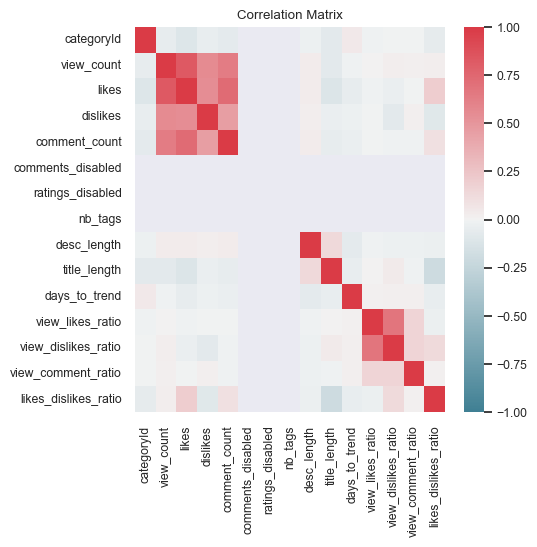

In [157]:
data = youtube.copy()

corr = data.corr()
plt.figure(figsize=(5, 5))
sns.set(font_scale=0.8)
# Define the colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1)

# Add a title to the plot
plt.title('Correlation Matrix')
plt.show()

In [158]:
youtube.drop(["days_to_trend", 'trending_date',"category" , "title",'tags','description', 'thumbnail_link','channelTitle' , "channelId", "video_id" , "publishedAt"],axis=1,inplace=True)
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 0 to 17727
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   categoryId            16015 non-null  int64  
 1   view_count            16015 non-null  int64  
 2   likes                 16015 non-null  int64  
 3   dislikes              16015 non-null  int64  
 4   comment_count         16015 non-null  int64  
 5   comments_disabled     16015 non-null  bool   
 6   ratings_disabled      16015 non-null  bool   
 7   nb_tags               16015 non-null  int64  
 8   desc_length           16015 non-null  int64  
 9   title_length          16015 non-null  int64  
 10  view_likes_ratio      16015 non-null  float64
 11  view_dislikes_ratio   16015 non-null  float64
 12  view_comment_ratio    16015 non-null  float64
 13  likes_dislikes_ratio  16015 non-null  float64
dtypes: bool(2), float64(4), int64(8)
memory usage: 1.6 MB


# MODELS 

In [159]:
y = youtube['view_count']
x = youtube.drop(['view_count'],axis=1,inplace=False) 

In [160]:
x.shape, y.shape

((16015, 13), (16015,))

In [161]:
 x.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16015 entries, 0 to 17727
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   categoryId            16015 non-null  int64  
 1   likes                 16015 non-null  int64  
 2   dislikes              16015 non-null  int64  
 3   comment_count         16015 non-null  int64  
 4   comments_disabled     16015 non-null  bool   
 5   ratings_disabled      16015 non-null  bool   
 6   nb_tags               16015 non-null  int64  
 7   desc_length           16015 non-null  int64  
 8   title_length          16015 non-null  int64  
 9   view_likes_ratio      16015 non-null  float64
 10  view_dislikes_ratio   16015 non-null  float64
 11  view_comment_ratio    16015 non-null  float64
 12  likes_dislikes_ratio  16015 non-null  float64
dtypes: bool(2), float64(4), int64(7)
memory usage: 1.5 MB


## Cross validation
Cross-validation and train-test splitting are two common techniques used in machine learning to evaluate the performance of a model on unseen data. While train-test splitting involves splitting the available data into a training set and a separate testing set, cross-validation involves dividing the data into multiple folds and training and testing the model on different combinations of these folds. Here are some reasons why cross-validation may be preferred over train-test splitting:

More efficient use of data: When using train-test splitting, a portion of the data is set aside for testing, which means that less data is available for training the model. In contrast, cross-validation involves using all of the data for both training and testing, which can be particularly useful when working with small datasets.

Better estimate of model performance: Cross-validation can provide a more accurate estimate of how well the model is likely to perform on new, unseen data, since it evaluates the model on multiple different combinations of the data. In contrast, train-test splitting may provide a biased estimate of performance if the particular split of data happens to be unrepresentative of the overall dataset.

Reduced risk of overfitting: When using train-test splitting, it's possible to overfit the model to the training data and obtain a high accuracy score on the test set by chance. In contrast, cross-validation helps to reduce this risk by evaluating the model on multiple different combinations of the data.

Overall, while train-test splitting is a simple and useful technique for evaluating model performance, cross-validation can provide a more accurate and reliable estimate of performance, particularly when working with small datasets or when the risk of overfitting is a concern.

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

x_train,y_test,y_train,y_test= train_test_split(x, y, test_size=0.25,shuffle=False)
# Linear Regression
lr = LinearRegression()
# Decision Tree Regression
tree = DecisionTreeRegressor()
# Random Forest Regression
forest = RandomForestRegressor(n_estimators=100)
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
# Multi-layer Perceptron Regression
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
# Gradient Boosting Regression
gbr = GradientBoostingRegressor()
# Neural Network Regression
nnr = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)

models_dict = {
    'Linear Regression': lr,
    'Decision Tree': tree,
    'Random Forest': forest,
    'KNN': knn,
    'MLP': mlp,
    'Gradient Boosting': gbr,
    'Neural Network': nnr
}
scores = []

for name, model in models_dict.items():
    score = cross_val_score(model, x, y , cv=6)
    print("For "+ name +", score of 5 folds is :",score)
    print("-"*10)
    scores.append(score)
    

For Linear Regression, score of 5 folds is : [0.29747712 0.69302704 0.59732977 0.77723596 0.63277058 0.64241781]
----------
For Decision Tree, score of 5 folds is : [0.86053485 0.92843161 0.94813568 0.96818001 0.95324574 0.91699721]
----------
For Random Forest, score of 5 folds is : [0.98787827 0.97668516 0.96602947 0.97737988 0.91018202 0.95128423]
----------
For KNN, score of 5 folds is : [0.79489375 0.64988528 0.68600181 0.75864706 0.68760932 0.64476421]
----------
For MLP, score of 5 folds is : [0.74239285 0.81572844 0.71066352 0.85656502 0.82294823 0.75281696]
----------
For Gradient Boosting, score of 5 folds is : [0.98869211 0.96720233 0.97491379 0.97616021 0.9386833  0.96256749]
----------
For Neural Network, score of 5 folds is : [0.48100775 0.78184024 0.601131   0.86608726 0.77444606 0.74319209]
----------


In [163]:
models_dict.keys()

dict_keys(['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'MLP', 'Gradient Boosting', 'Neural Network'])

The boxplot provides a summary of the distribution of the results for each of the 5-folds, including the median, quartiles, and outliers. It is a useful way to visualize the spread of the scores and identify any variability or inconsistency in the model's performance across different splits. 

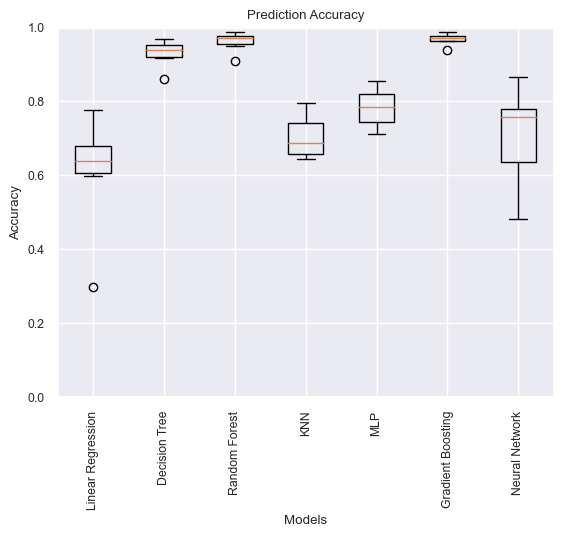

In [164]:
# Plot the results
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'MLP', 'Gradient Boosting', 'Neural Network']
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xticklabels(models_dict.keys(), rotation=90)
ax.set_ylim([0,1])
ax.set_title('Prediction Accuracy')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

In [182]:
scores 

[array([0.29747712, 0.69302704, 0.59732977, 0.77723596, 0.63277058,
        0.64241781]),
 array([0.86053485, 0.92843161, 0.94813568, 0.96818001, 0.95324574,
        0.91699721]),
 array([0.98787827, 0.97668516, 0.96602947, 0.97737988, 0.91018202,
        0.95128423]),
 array([0.79489375, 0.64988528, 0.68600181, 0.75864706, 0.68760932,
        0.64476421]),
 array([0.74239285, 0.81572844, 0.71066352, 0.85656502, 0.82294823,
        0.75281696]),
 array([0.98869211, 0.96720233, 0.97491379, 0.97616021, 0.9386833 ,
        0.96256749]),
 array([0.48100775, 0.78184024, 0.601131  , 0.86608726, 0.77444606,
        0.74319209])]

In scikit-learn, the score method for a machine learning model returns the coefficient of determination, R², which is a statistical measure that represents how well the model fits the data. It is the proportion of the variance in the dependent variable (y) that can be explained by the independent variables (X) in the model. The score method returns a value between 0 and 1, with 1 indicating a perfect fit and 0 indicating that the model explains none of the variability in the dependent variable.

In [181]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.25,shuffle=False)

for name, model in models_dict.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print("For "+ name +", Root means score, Variance score, and score:")
    print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    print("Result :",round(model.score(x_test, y_test), 2))
    print("")
 

For Linear Regression, Root means score, Variance score, and score:
Root means score 1458682.2625549387
Variance score: 0.69
Result : 0.69

For Decision Tree, Root means score, Variance score, and score:
Root means score 1030409.8787096868
Variance score: 0.84
Result : 0.84

For Random Forest, Root means score, Variance score, and score:
Root means score 746595.7097527548
Variance score: 0.92
Result : 0.92

For KNN, Root means score, Variance score, and score:
Root means score 1477337.2958229445
Variance score: 0.68
Result : 0.68

For MLP, Root means score, Variance score, and score:
Root means score 1172890.3004035098
Variance score: 0.80
Result : 0.8

For Gradient Boosting, Root means score, Variance score, and score:
Root means score 712705.1379850686
Variance score: 0.93
Result : 0.93

For Neural Network, Root means score, Variance score, and score:
Root means score 1249117.2749531758
Variance score: 0.77
Result : 0.77

